In [3]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


In [19]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
import pydotplus
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *


# Load data
df = pd.read_csv('data/diabetes.csv')

sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 768    │ │ int32       │ 7     │                                                          │
│ │ Number of columns │ 9      │ │ float64     │ 2     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name            ┃ NA  ┃ NA %  ┃ mean    ┃ sd     ┃ p0    ┃ p25    ┃ p50    ┃ p75    ┃ p100 ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━━┩  │
│ │ Pregnancies            │   0 │     0 │   3.845 │   3.37 │     0 │      1 │      3 │      6 │   17 │  ▇▅▃▁  │  │
│ │ Glucose                │   0 │     0 │   120.9 │  31.97 │     0 │     99 │    117 │  140.2 │  199 │   ▅▇▃▂ │  │
│ │ BloodPressure          │   0 │     0 │   69.11 │  19.36 │     0 │     62 │     72 │     80 │  122 │ ▁ ▂▇▃  │  │
│ │ SkinThickness          │   0 │     0 │   20.54 │  15.95 │     0 │      0 │     23 │     32 │   99 │  ▇▇▅   │  │
│ │ Insulin                │   0 │     0 │    79.8 │  115.2 │     0 │      0 │   30.5 │  127.2 │  846 │   ▇▂   │  │
│ │ BMI                    │   0 │     0 │   31.99 │  7.884 │     0 │   27.3 │     32 │   36.6 │ 67.1 │  ▁▇▆▁  │  │
│ │ DiabetesPedigreeFuncti │   0 │     0 │  0.4719 │ 0.3313 │ 0.078 │ 0.2437 │ 0.3725 │ 0.6262 │ 2.42 │  ▇▃▁   │  │
│ │ on                     │     │       │         │        │       │        │        │        │      │        │  │
│ │ Age                    │   0 │     0 │   33.24 │  11.76 │    21 │     24 │     29 │     41 │   81 │  ▇▃▂▁  │  │
│ │ Outcome                │   0 │     0 │   0.349 │  0.477 │     0 │      0 │      0 │      1 │    1 │ ▇    ▅ │  │
│ └────────────────────────┴─────┴───────┴─────────┴────────┴───────┴────────┴────────┴────────┴──────┴────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [5]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Pregnancies                 [6.0, 1.0, 8.0, 0.0, 5.0, 3.0, 10.0, 2.0, 4.0,...
Glucose                     [148.0, 85.0, 183.0, 89.0, 137.0, 116.0, 78.0,...
BloodPressure               [72.0, 66.0, 64.0, 40.0, 74.0, 50.0, 0.0, 70.0...
SkinThickness               [35.0, 29.0, 0.0, 23.0, 32.0, 45.0, 19.0, 47.0...
Insulin                     [0.0, 94.0, 168.0, 88.0, 543.0, 846.0, 175.0, ...
BMI                         [33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35....
DiabetesPedigreeFunction    [0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.2...
Age                         [50.0, 31.0, 32.0, 21.0, 33.0, 30.0, 26.0, 29....
Outcome                                                            [1.0, 0.0]
dtype: object

In [6]:
#   #Imputer        #Use Case               #Encoding   #Type               #Strategy
#   SimpleImputer   Numerical missing       values      No encoding         Mean, median, most frequent, constant
#   KNNImputer      Numerical missing       values      No encoding         Mean or median of nearest neighbors
#   OrdinalEncoder  Ordinal categorical     variables	Ordinal encoding	Integer values based on order
#   OneHotEncoder   Nominal categorical     variables	One-hot encoding	Binary features
#   LabelEncoder    Nominal categorical     variables   Label encoding      Unique integer values


# setting up for pycaret
cat_features = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
testing = setup(df, target='Outcome', categorical_features=cat_features, use_gpu=True)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

,Description,Value
0,Session id,8707
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 24)"
5,Transformed train set shape,"(537, 24)"
6,Transformed test set shape,"(231, 24)"
7,Numeric features,1
8,Categorical features,7
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: Intel(R) Iris(R) Xe Graphics, Vendor: Intel(R) Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves t

In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7842,0.8440,0.6325,0.7159,0.6689,0.5105,0.5146,0.2050
et,Extra Trees Classifier,0.7563,0.8050,0.5365,0.7006,0.6036,0.4333,0.4437,0.2720
lr,Logistic Regression,0.7525,0.8056,0.5412,0.6854,0.6019,0.4267,0.4348,0.1790
rf,Random Forest Classifier,0.7432,0.8263,0.5307,0.6686,0.5903,0.4072,0.4139,0.2750
lda,Linear Discriminant Analysis,0.7432,0.7971,0.5409,0.6617,0.5939,0.4093,0.4145,0.0780
ridge,Ridge Classifier,0.7395,0.8022,0.5251,0.6586,0.5832,0.3977,0.4037,0.0830
lightgbm,Light Gradient Boosting Machine,0.7393,0.8035,0.5833,0.6356,0.6054,0.4125,0.4149,1.3450
ada,Ada Boost Classifier,0.7338,0.7777,0.5716,0.6349,0.5978,0.4003,0.4043,0.1450
knn,K Neighbors Classifier,0.7189,0.7567,0.4974,0.6164,0.5472,0.3484,0.3540,0.1670
dt,Decision Tree Classifier,0.7115,0.6793,0.5728,0.5770,0.5687,0.3551,0.3576,0.0630


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

In [9]:
#selected model
selected_model = create_model('dt')

predict_model(best_model, df.sample(20))

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.7564,0.6842,0.6842,0.6842,0.5128,0.5128
1,0.6111,0.5195,0.2105,0.4000,0.2759,0.0438,0.0481
2,0.7593,0.7541,0.7368,0.6364,0.6829,0.4906,0.4940
3,0.7222,0.7015,0.6316,0.6000,0.6154,0.3982,0.3985
4,0.6667,0.5985,0.3684,0.5385,0.4375,0.2123,0.2200
5,0.7407,0.7278,0.6842,0.6190,0.6500,0.4449,0.4463
6,0.6296,0.6180,0.5789,0.4783,0.5238,0.2253,0.2280
7,0.7547,0.7198,0.6111,0.6471,0.6286,0.4457,0.4461
8,0.6604,0.6079,0.4444,0.5000,0.4706,0.2219,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8000,0.8438,0.7500,0.7500,0.7500,0.5833,0.5833


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
674,8,91,82,0,0,35.599998,0.587,68,0,0,0.9408
67,2,109,92,0,0,42.700001,0.845,54,0,1,0.7279
204,6,103,72,32,190,37.700001,0.324,55,0,0,0.6454
164,0,131,88,0,0,31.600000,0.743,32,1,1,0.7027
231,6,134,80,37,370,46.200001,0.238,46,1,0,0.7945
385,1,119,54,13,50,22.299999,0.205,24,0,0,0.9800
25,10,125,70,26,115,31.100000,0.205,41,1,1,0.6925
565,2,95,54,14,88,26.100000,0.748,22,0,0,0.9683
306,10,161,68,23,132,25.500000,0.326,47,1,1,0.8592
512,9,91,68,0,0,24.200001,0.200,58,0,0,0.9749


In [10]:
tuned_model = tune_model(best_model)
tuned_selected = tune_model(selected_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7778,0.8000,0.5789,0.7333,0.6471,0.4882,0.4954
1,0.7778,0.8481,0.6842,0.6842,0.6842,0.5128,0.5128
2,0.6296,0.7233,0.4211,0.4706,0.4444,0.1680,0.1685
3,0.7593,0.8045,0.5263,0.7143,0.6061,0.4384,0.4490
4,0.7407,0.7985,0.5789,0.6471,0.6111,0.4176,0.4190
5,0.7222,0.7925,0.5263,0.6250,0.5714,0.3682,0.3711
6,0.7037,0.7744,0.5263,0.5882,0.5556,0.3344,0.3355
7,0.8113,0.8460,0.7222,0.7222,0.7222,0.5794,0.5794
8,0.8113,0.7952,0.6667,0.7500,0.7059,0.5677,0.5698


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7222,0.7000,0.3684,0.7000,0.4828,0.3170,0.3476
1,0.7037,0.7113,0.4211,0.6154,0.5000,0.2998,0.3107
2,0.7407,0.7571,0.5263,0.6667,0.5882,0.4028,0.4088
3,0.6481,0.6248,0.2632,0.5000,0.3448,0.1349,0.1479
4,0.7037,0.7744,0.3684,0.6364,0.4667,0.2812,0.3013
5,0.7963,0.8278,0.5789,0.7857,0.6667,0.5248,0.5375
6,0.7778,0.8030,0.5789,0.7333,0.6471,0.4882,0.4954
7,0.7925,0.8468,0.6667,0.7059,0.6857,0.5310,0.5315
8,0.7547,0.7444,0.5000,0.6923,0.5806,0.4136,0.4246


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [11]:
predict_model(tuned_model, df.sample(10))
predict_model(tuned_selected, df.sample(10))

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8000,0.8333,0.7500,0.7500,0.7500,0.5833,0.5833


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.7000,0.7708,0.5000,0.6667,0.5714,0.3478,0.3563


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,prediction_label,prediction_score
674,8,91,82,0,0,35.599998,0.587,68,0,0,0.7727
67,2,109,92,0,0,42.700001,0.845,54,0,0,0.7727
204,6,103,72,32,190,37.700001,0.324,55,0,1,0.6842
164,0,131,88,0,0,31.600000,0.743,32,1,0,0.5882
231,6,134,80,37,370,46.200001,0.238,46,1,1,0.6842
385,1,119,54,13,50,22.299999,0.205,24,0,0,0.9508
25,10,125,70,26,115,31.100000,0.205,41,1,0,0.8500
565,2,95,54,14,88,26.100000,0.748,22,0,0,0.8500
306,10,161,68,23,132,25.500000,0.326,47,1,1,0.6842
512,9,91,68,0,0,24.200001,0.200,58,0,0,1.0000


In [12]:
evaluate_model(tuned_selected)
#interpret_model(tuned_selected)
print(type(tuned_selected))

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<class 'sklearn.tree._classes.DecisionTreeClassifier'>


In [33]:
save_model(tuned_selected, model_name='bestmodel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None, include=['SkinThickness'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Pregnancies', 'Insulin', 'B...
                                                               return_df=True,
                                                               smoothing=10,
                       

In [14]:
feature_cols = cat_features
X = df[feature_cols] # Features
y = df['Outcome'] # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Train Decision Tree Classifer
tuned_selected = tuned_selected.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = tuned_selected.predict(X_test)

# Model Accuracy, how often is the classifier correct?
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.696969696969697


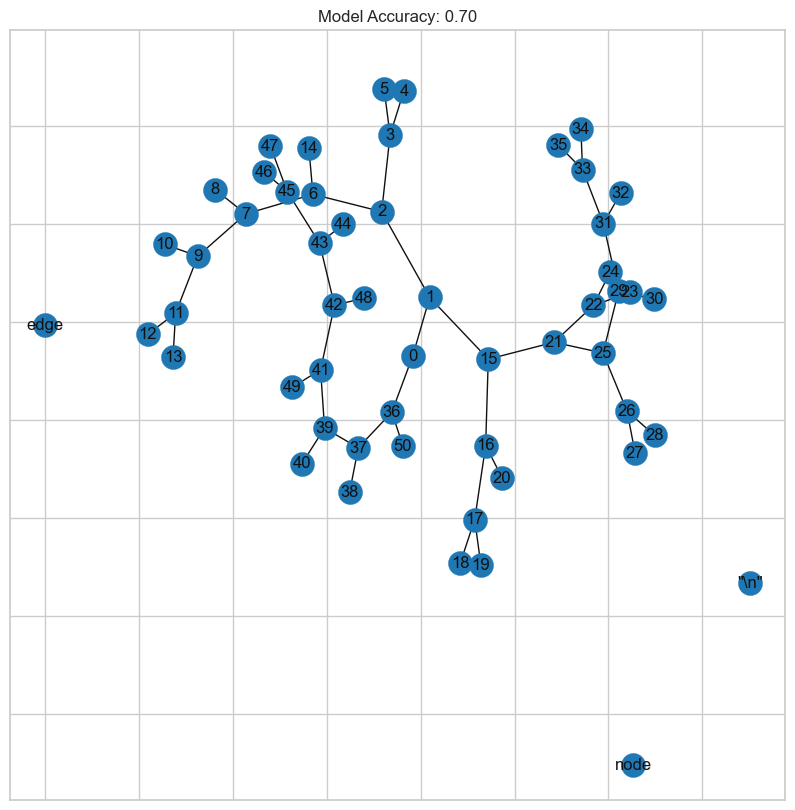

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges to the graph
dot_data = export_graphviz(tuned_selected, out_file=None, feature_names=feature_cols, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
for node in graph.get_nodes():
    G.add_node(node.get_name())
for edge in graph.get_edges():
    G.add_edge(edge.get_source(), edge.get_destination())

# Convert the directed graph to an undirected graph
G = G.to_undirected()

# Position the nodes in the graph
pos = nx.spring_layout(G)

# Create a figure
plt.figure(figsize=(10, 10))

# Draw the nodes and edges
nx.draw_networkx_nodes(G, pos)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos)

# Add accuracy score to the plot
plt.title(f"Model Accuracy: {accuracy:.2f}")

# Show the plot
plt.show()

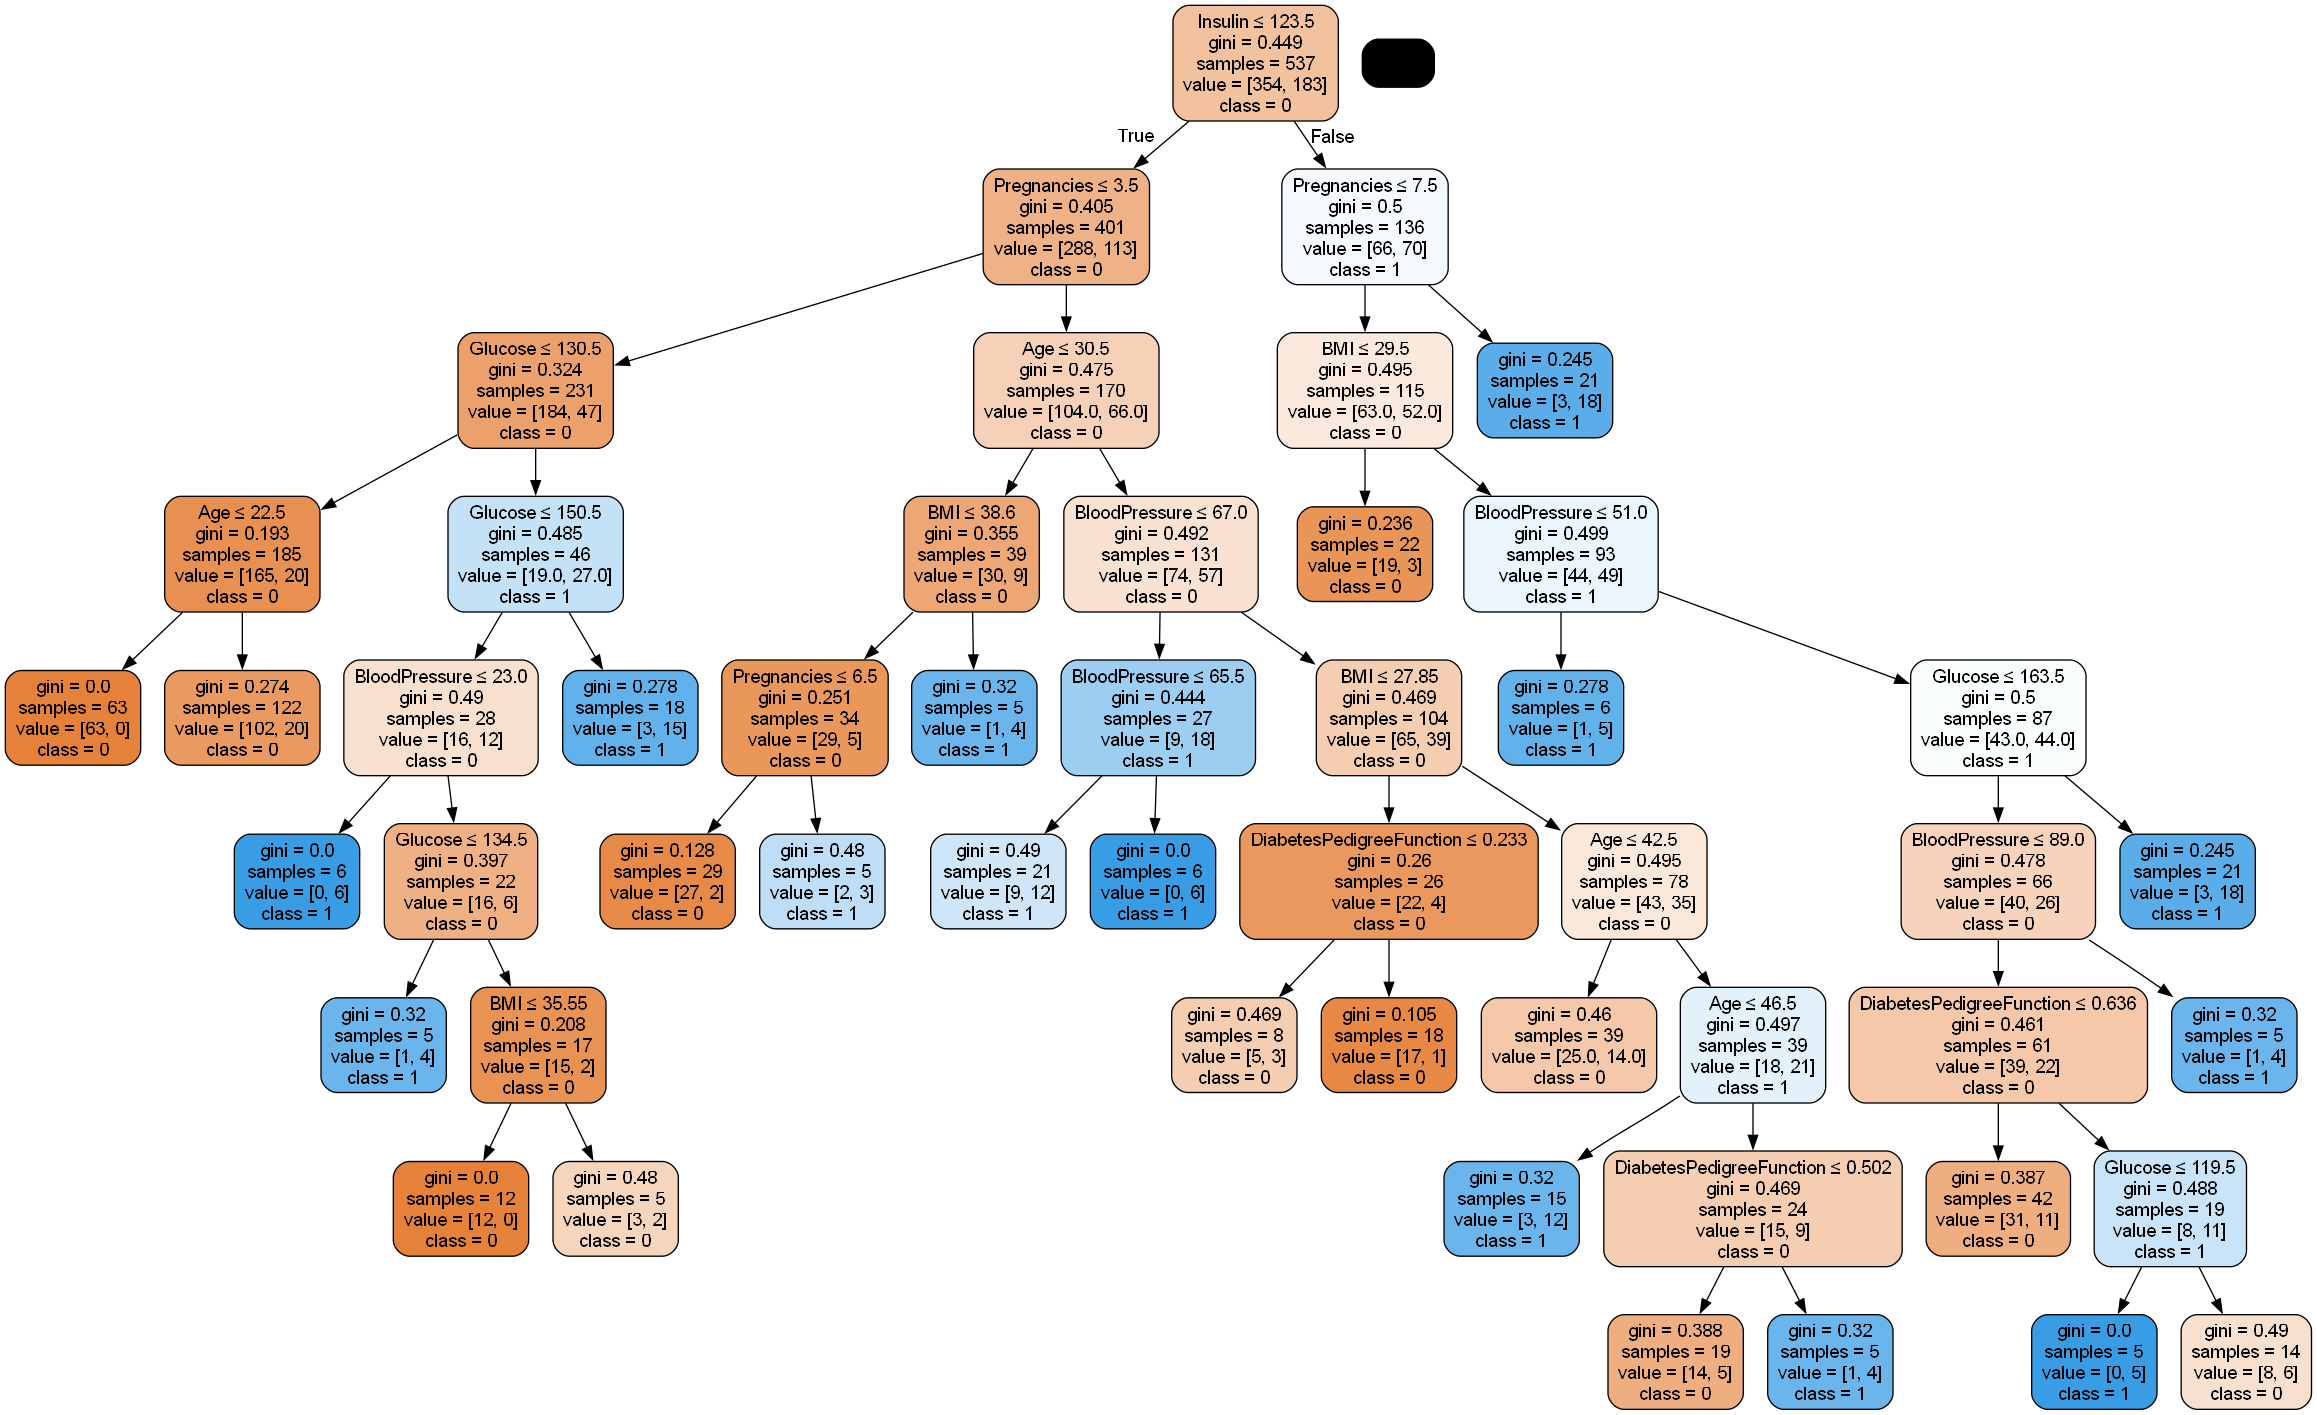

In [22]:
from six import StringIO 
from IPython.display import Image  
dot_data = StringIO()
export_graphviz(tuned_selected, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())